Вопросы - данные о рынке недвижимости в ОАЭ
1. Каково распределение арендуемой недвижимости по городам?
2. Как менялись средние цены на аренду с 2018 по 2024 годы?
3. Какова корреляция между площадью недвижимости и ее стоимостью?
4. Каково распределение ценовых категорий аренды по типам недвижимости?
5. Прогнозирование цен на аренду недвижимости

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cars = pd.read_csv("cars.csv", sep=',')

In [ ]:
labels = cars.transmission_type.unique()
labels

array(['Automatic Transmission', 'Manual Transmission'], dtype=object)

In [ ]:

print(auto)

9697


In [ ]:

print(auto)

256


In [ ]:
cars.shape[0]

9953

In [ ]:
cars['transmission_type'].count('Automatic Transmission')

TypeError: Series.count() takes 1 positional argument but 2 were given

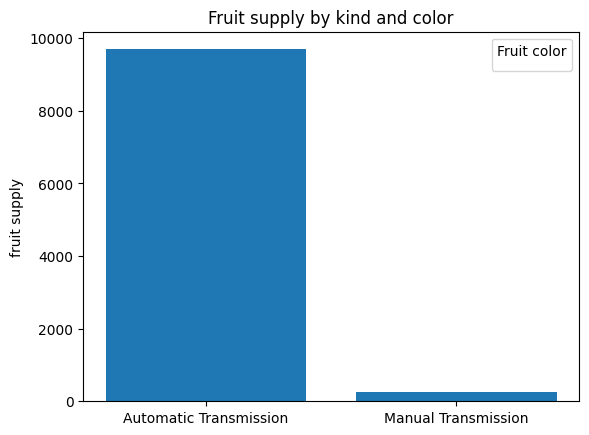

In [ ]:
automatic_counts = cars['transmission_type'].value_counts().loc['Automatic Transmission']
manual_counts = cars['transmission_type'].value_counts().loc['Manual Transmission']

fig, ax = plt.subplots()

ax.bar(labels, [automatic_counts, manual_counts])

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

([<matplotlib.patches.Wedge at 0x7c5482f0e380>,
 [Text(-1.0964107951452706, 0.08878833419383059, 'Automatic Transmission'),
  Text(1.0964107935865899, -0.08878835344134037, 'Manual Transmission')],
 [Text(-0.5980422518974203, 0.04843000046936213, '97.4%'),
  Text(0.5980422510472307, -0.04843001096800383, '2.6%')])

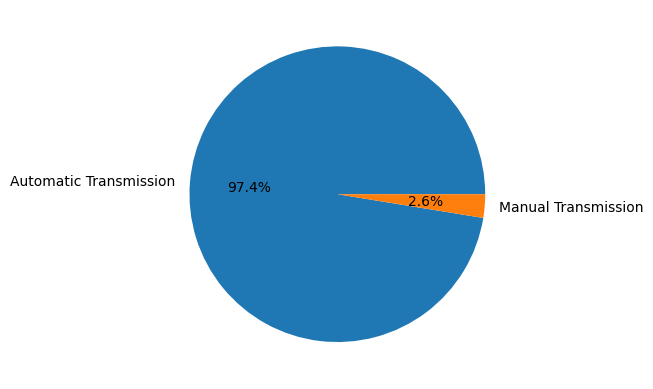

In [ ]:
automatic_counts = cars['transmission_type'].value_counts().loc['Automatic Transmission']
manual_counts = cars['transmission_type'].value_counts().loc['Manual Transmission']
sizes = [automatic_counts, manual_counts]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

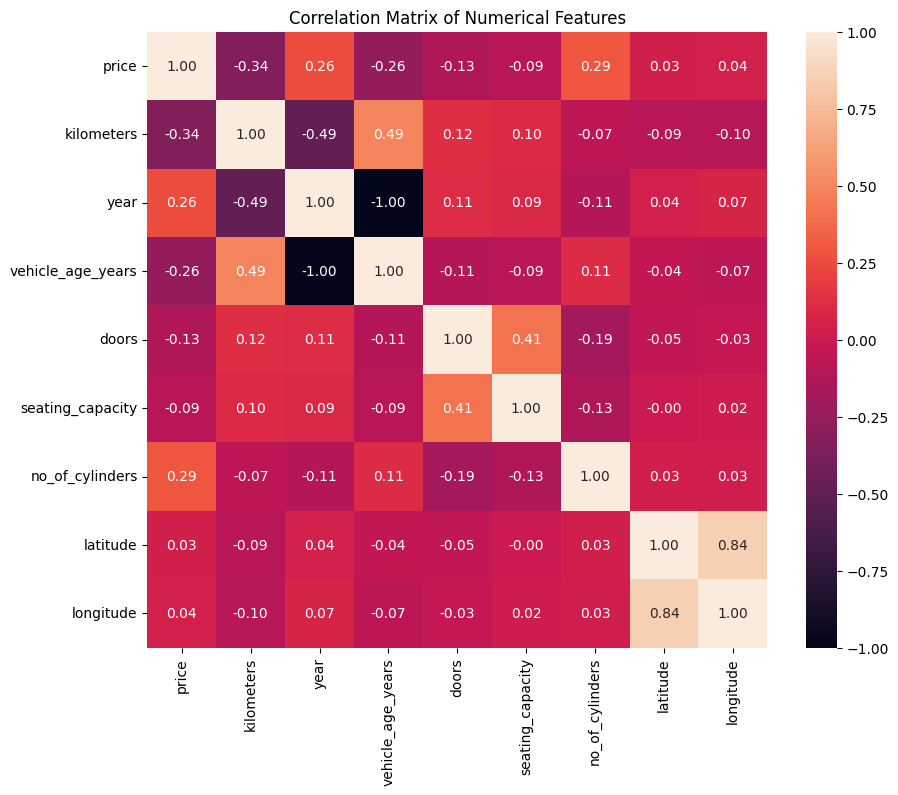

In [ ]:
import seaborn as sns
# Correlation matrix of numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = cars.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

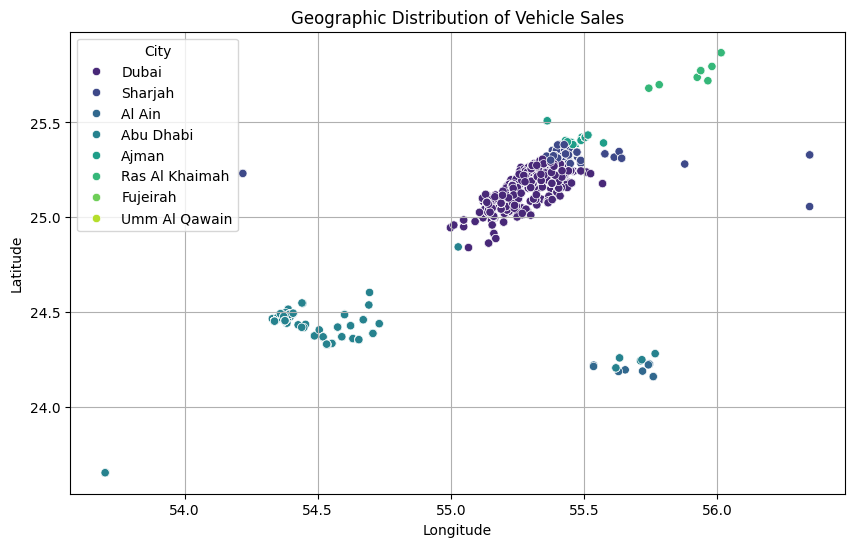

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=cars, hue='city', palette='viridis')
plt.title('Geographic Distribution of Vehicle Sales')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='City')
plt.grid(True)
plt.show()

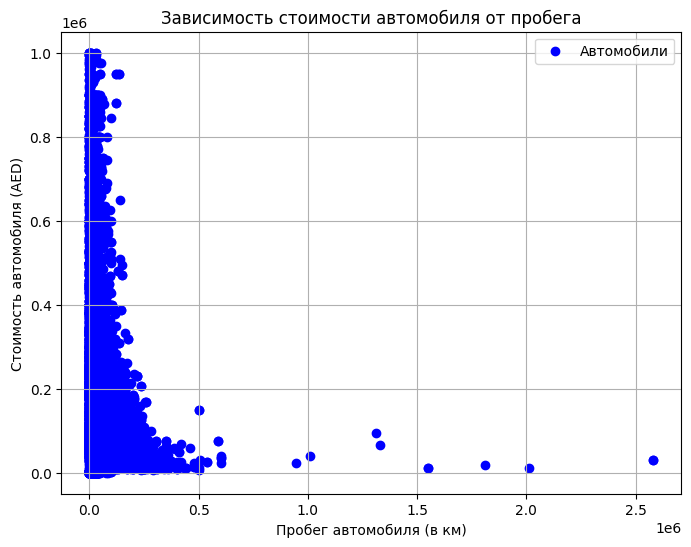

In [ ]:
import matplotlib.pyplot as plt

# Строим scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(cars['kilometers'], cars['price'], color='b', label='Автомобили')
plt.xlabel('Пробег автомобиля (в км)')
plt.ylabel('Стоимость автомобиля (AED)')
plt.title('Зависимость стоимости автомобиля от пробега')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(cars['vehicle_age_years'], cars['price'], color='b', label='Автомобили')
plt.xlabel('Годы с даты изготовления автомобиля')
plt.ylabel('Стоимость автомобиля (AED)')
plt.title('Зависимость стоимости автомобиля от пробега')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
import plotly.express as px
fig = px.scatter(cars, x ='kilometers', y='price', title='Влияние пробега на цену автомобиля',  labels={'kilometers': 'Пробег, км', 'price': 'Цена, AED'})
fig.show()

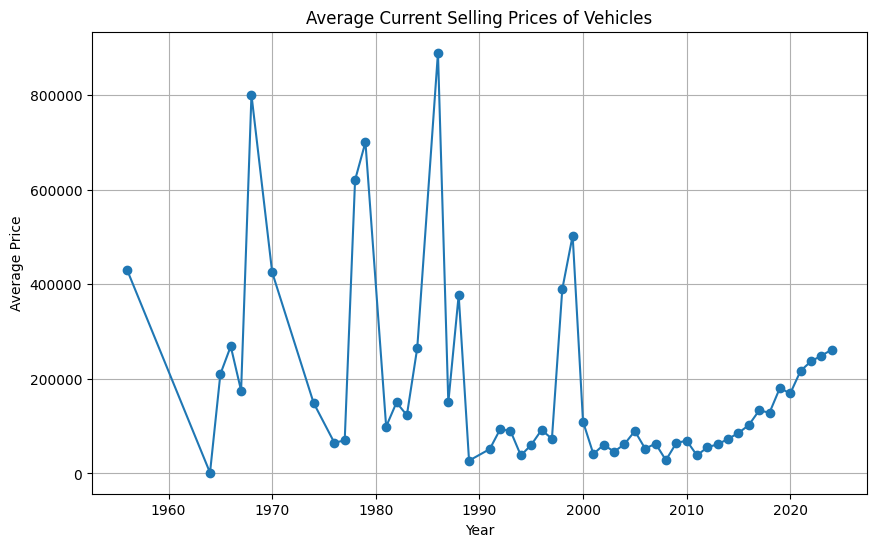

In [ ]:
import matplotlib.pyplot as plt
average_price_by_year = cars.groupby('year')['price'].mean()
plt.figure(figsize=(10, 6))
average_price_by_year.plot(marker='o')
plt.title('Average Current Selling Prices of Vehicles')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

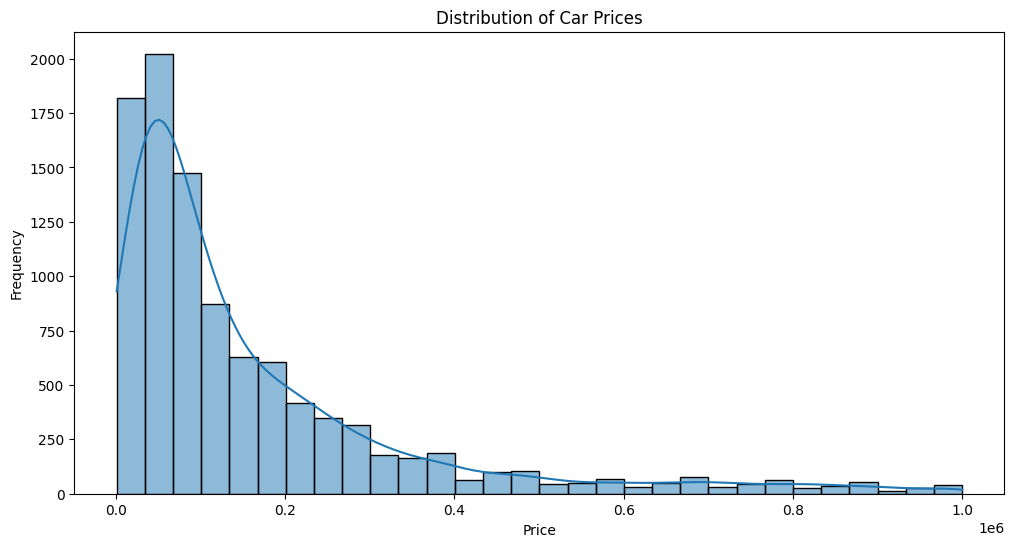

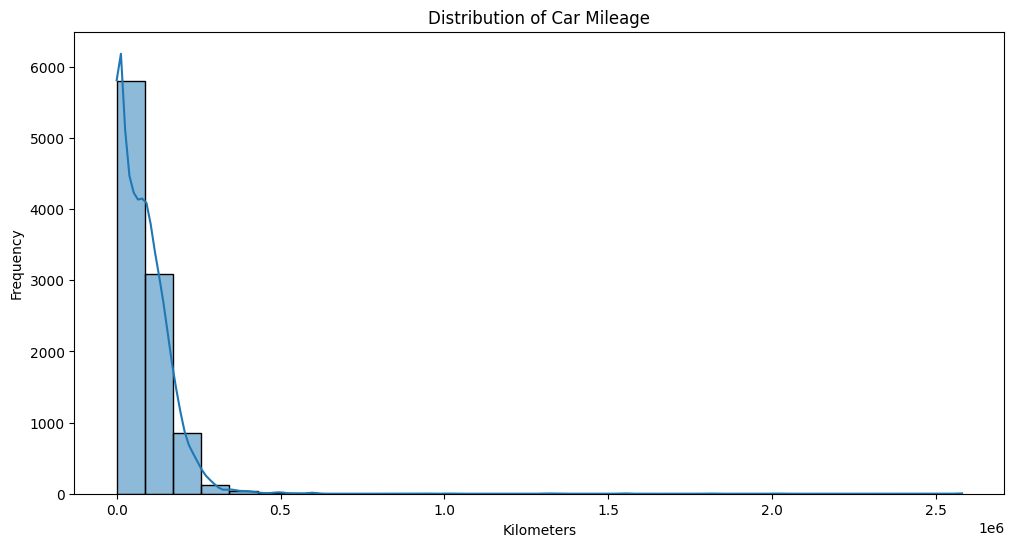

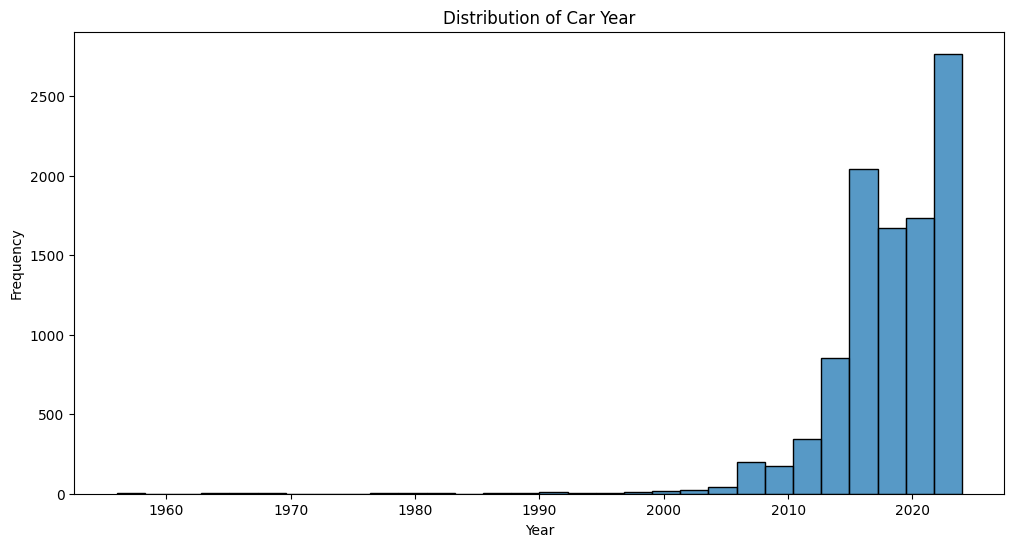

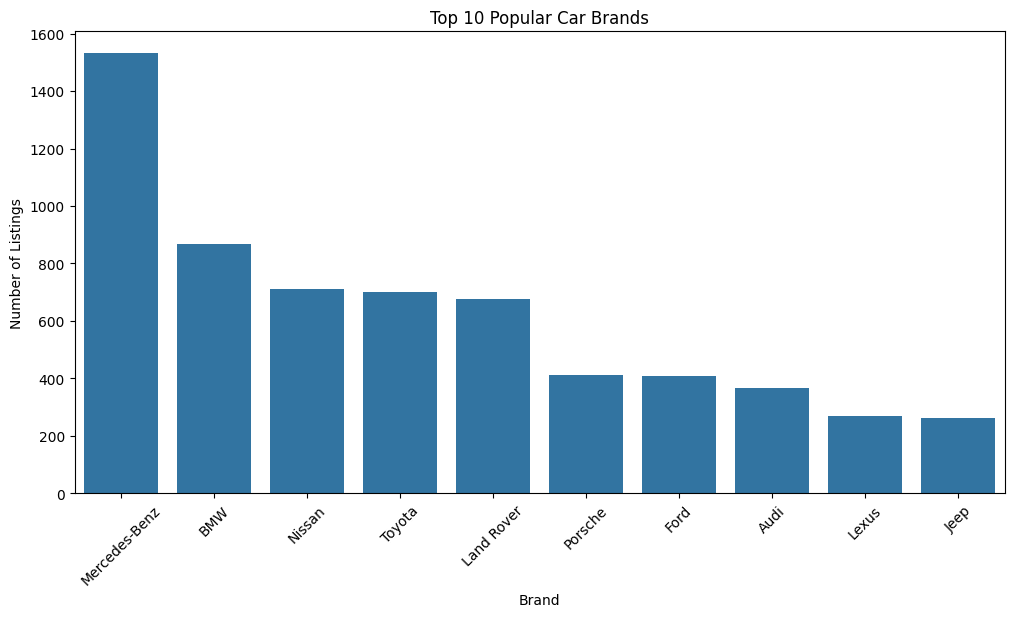

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(cars['price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of mileage
plt.figure(figsize=(12, 6))
sns.histplot(cars['kilometers'], kde=True, bins=30)
plt.title('Distribution of Car Mileage')
plt.xlabel('Kilometers')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of year
plt.figure(figsize=(12, 6))
sns.histplot(cars['year'], kde=False, bins=30)
plt.title('Distribution of Car Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of popular brands
plt.figure(figsize=(12, 6))
brand_counts = cars['brand'].value_counts().nlargest(10)
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Top 10 Popular Car Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

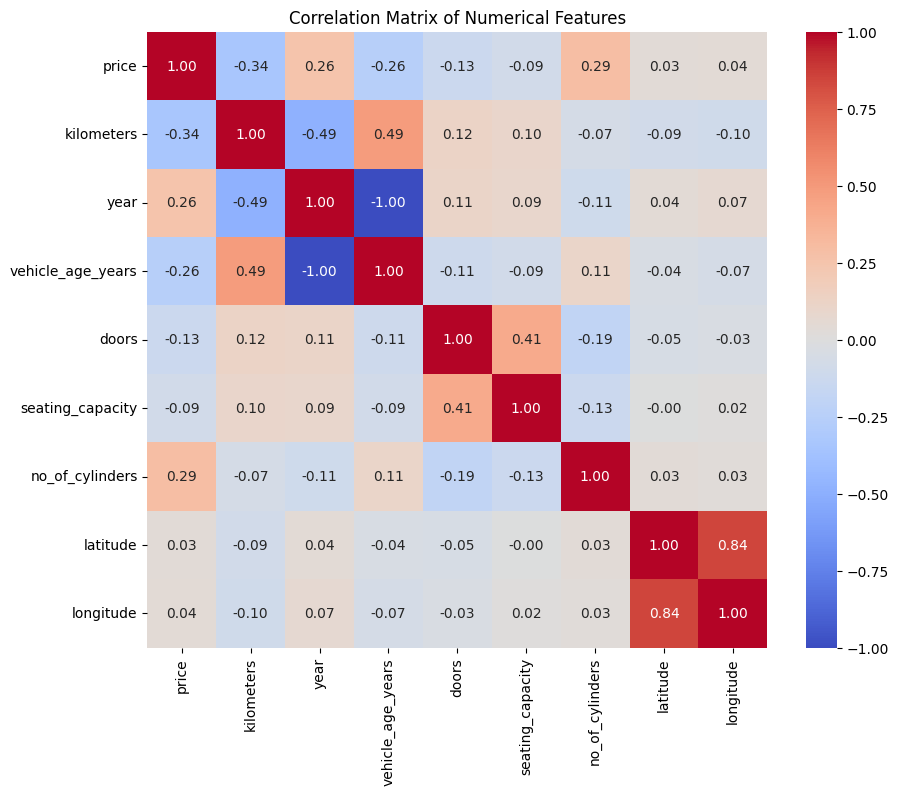

In [ ]:
!pip install plotly
import plotly.express as px

In [ ]:
fig = px.scatter_mapbox(cars,
                        lat="latitude",
                        lon="longitude",
                        color_continuous_scale="jet",
                        hover_data=["latitude", "longitude"],
                        zoom=9,
                        height=1000, width=1200,
                        title="Map of cars")
fig.update_layout(mapbox_style="open-street-map")
fig.show()